<a href="https://colab.research.google.com/github/sanjithamanivannan/EDA/blob/master/Exploratory_Data_Analysis_of_Car_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

 **Project Title:**

**Exploratory Data Analysis Of Car Features**

**Exploratory Data Analysis:**

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.It helps in creating Machine Learning models. Through the process of EDA many underlying patterns and insights can be found.

**Dataset:  "Car Features and MSRP"**

The dataset describes almost 12,000 car models, sold in the USA between 1990 and 2017 with the market price (new or used) and some features of the cars. It has more than 11,000 rows and more than 15 columns.

**Objective:**

The objective of the project is to do data pre-processing and exploratory data analysis of the dataset.

# 1.Importing the required libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


## 1.1 Loading data into the dataframe

In [ ]:
#importing dataset into the dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
#display top 5 rows 
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#display last 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## 1.2 Checking the datatypes and the basic summary statistics

In [ ]:
#to check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
#to show the basic summary stats
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# 2.Dropping irrelevant columns

The dataset may contain certain columns which are not of much relevance or are not of much use. It is better to drop such columns. Hence, the irrelevant columns are dropped in this step.

In [ ]:
#dropping irrelevant columns
df = df.drop(['Engine Fuel Type','Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


Columns dropped:

The "Engine fuel type" and "Market category" columns are dropped.

Reasoning:

"Engine fuel type" column has been dropped since it has a lot of null values which could affect the rest of the dataset. "Market category" column does not seem to have much relevance to this analysis. Hence, it has been dropped.

# 3.Renaming the columns

In [ ]:
df = df.rename(columns={'Engine HP':'HP',
                        'Engine Cylinders':'Cylinders',
                        'Transmission Type':'Transmission',
                        'Driven_Wheels':'Drive Mode',
                        'highway MPG':'MPG-H',
                        'city mpg':'MPG-C',
                        'MSRP':'Price'})   #columns are renamed
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# 4.Dropping the rows with duplicate values

Datasets often contain duplicate values which may affect the analysis. Hence, the rows with duplicate values are dropped in this step.

In [ ]:
df.shape

(11914, 14)

In [ ]:
#to find duplicate values
duplicate_rows=df[df.duplicated()]
duplicate_rows.shape

(791, 14)

In [ ]:
#to drop the duplicate values
df=df.drop_duplicates(keep='first')
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [ ]:
df.shape

(11123, 14)

## 4.1 Dropping/Imputing the missing or null values

Missing or null values in the dataset may also affect the analysis. Hence, the null values are imputed in this step.

In [ ]:
#finding the missing values
print(df.isnull().sum())

Make                0
Model               0
Year                0
HP                 69
Cylinders          30
Transmission        0
Drive Mode          0
Number of Doors     6
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


In [ ]:
#imputing the missing values using median
df=df.fillna(df.median())
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# 5.Detecting outliers

An outlier is a value that is distant from other values. It lies outside of the range of the other values in the dataset. If the outliers are not removed, they can have a big impact on the analysis result. Hence, the outliers are detected and removed in this step.

Outliers are detected using the boxplot graph method.

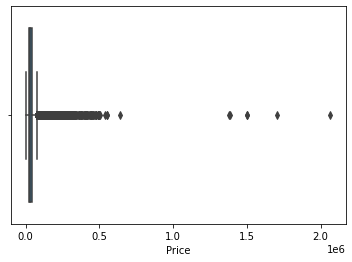

In [ ]:
sn.boxplot(x=df['Price'])

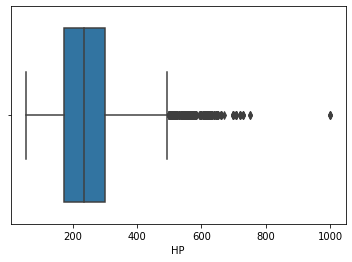

In [ ]:
sn.boxplot(x=df['HP'])

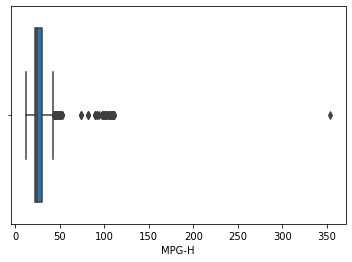

In [ ]:
sn.boxplot(x=df['MPG-H'])

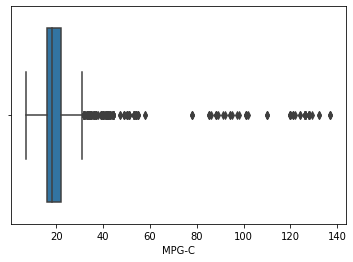

In [ ]:
sn.boxplot(x=df['MPG-C'])

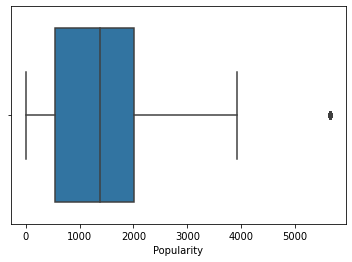

In [ ]:
sn.boxplot(x=df['Popularity'])

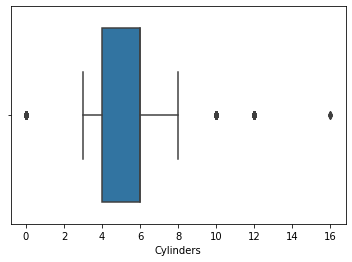

In [ ]:
sn.boxplot(x=df['Cylinders'])

## 5.1 Dropping the outliers

In [ ]:
#finding the IQR value to drop the outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1


In [ ]:
#dropping the outliers
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.shape

(8577, 14)

# 6.Finding the most represented car brands

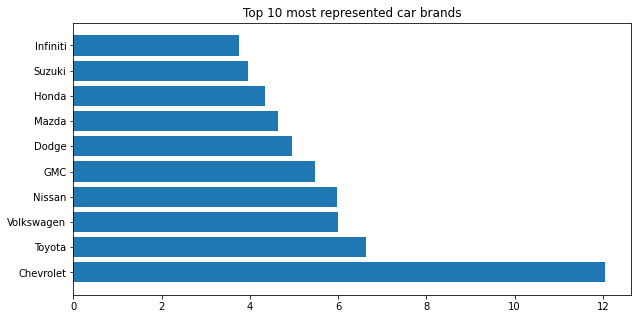

In [ ]:
#plotting a bar graph
brand_percent=df['Make'].value_counts()*100/sum(df['Make'].value_counts())
car_brands=brand_percent.index[:10]
plt.figure(figsize=(10,5))
plt.barh(car_brands,width=brand_percent[:10])
plt.title('Top 10 most represented car brands')
plt.show()

The above graph depicts the "Top 10 most represented car brands" in the dataset.

Inference:

From the graph, it is seen that "Chevrolet" is the most represented car brand.

## 6.1 Finding the average price of the "Top 10 most represented car brands"

The average prices of the "Top 10 most represented car brands" are found by using the mean value method.

In [ ]:
#average prices of cars
avg_prices=df[['Make','Price']].loc[(df['Make']=='Infiniti')|
                                (df['Make']=='Suzuki')|
                                (df['Make']=='Honda')|
                                (df['Make']=='Mazda')|
                                (df['Make']=='Dodge')|
                                (df['Make']=='GMC')|
                                (df['Make']=='Nissan')|
                                (df['Make']=='Volkswagen')|
                                (df['Make']=='Toyota')|
                                (df['Make']=='Chevrolet')].groupby('Make').mean()
print(avg_prices)

                   Price
Make                    
Chevrolet   28207.045499
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Infiniti    43127.822981
Mazda       20830.670025
Nissan      28352.543860
Suzuki      18168.241888
Toyota      27769.421793
Volkswagen  29032.817476


# 7.Correlation matrix

A correlation matrix is a table showing relations between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data.

In [ ]:
df.corr()

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.324661,-0.106613,0.241442,0.373182,0.335114,0.200714,0.592198
HP,0.324661,1.000000,0.733604,0.040792,-0.452891,-0.553967,0.095288,0.744757
Cylinders,-0.106613,0.733604,1.000000,0.020905,-0.691575,-0.746535,0.012437,0.388381
Number of Doors,0.241442,0.040792,0.020905,1.000000,0.008198,0.024603,-0.076936,0.131498
MPG-H,0.373182,-0.452891,-0.691575,0.008198,1.000000,0.937008,0.094122,-0.120675
MPG-C,0.335114,-0.553967,-0.746535,0.024603,0.937008,1.000000,0.082506,-0.196708
Popularity,0.200714,0.095288,0.012437,-0.076936,0.094122,0.082506,1.000000,0.112736
Price,0.592198,0.744757,0.388381,0.131498,-0.120675,-0.196708,0.112736,1.000000


**High correlation:**

* Cylinders and HP
> Cylinders and HP have high correlation because the more the number of cylinders,the more horse power the car generates.

* HP and Price
> HP and Price have high correlation because the higher the horse power of the car is, the higher the price of the car becomes.

* MPG-H and MPG-C

**High anticorrelation:**

* Cylinders and MPG-H/MPG-C
> Cylinders and highway MPG/city MPG have high anticorrelation because the lower MPG values imply high fuel consumption.

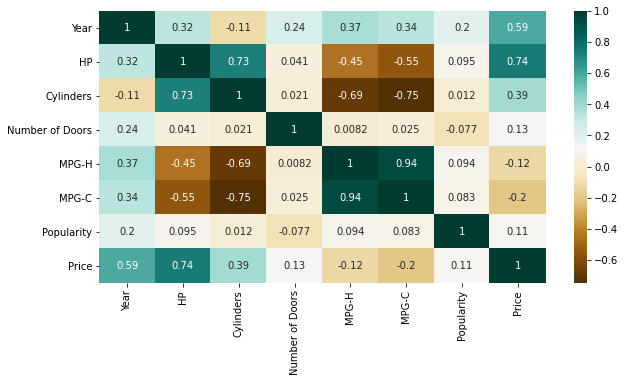

In [ ]:
#plotting heatmap based on correlation matrix
plt.figure(figsize=(10,5))
c=df.corr()
sn.heatmap(c,cmap='BrBG',annot=True)

The above heatmap shows the correlation and anticorrelation between different variables.

# 8.Performing EDA and plotting various graphs

## Variables affecting the car price

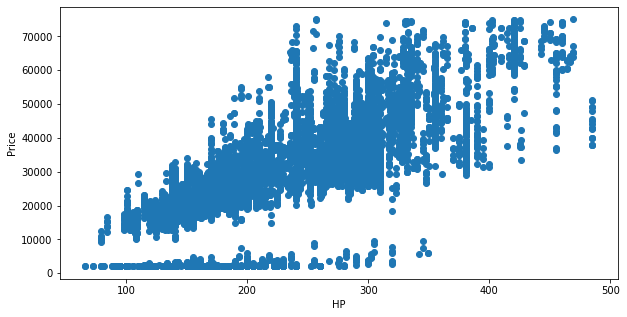

In [ ]:
#plotting scatterplot between price and HP
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(df['HP'],df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

The above scatterplot shows the correlation between Horse Power and Price.

Inference:

Positive correlation between Horse Power and Price. The increase in HP also increases the Price.

Hence, HP is a variable which affects the Price of the cars.

## The most sold cars based on body style of the car

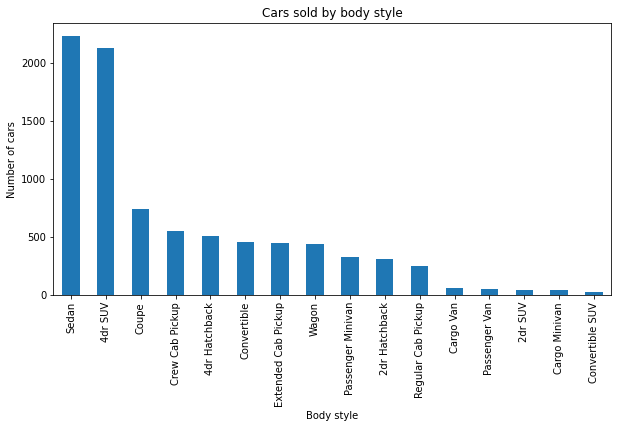

In [ ]:
#barplot showing cars sold by body style
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,5))
plt.title('Cars sold by body style')
plt.ylabel('Number of cars')
plt.xlabel('Body style');

The above barplot depicts the most sold cars based on body style of the car

Inference:

From the above barplot we can infer that **Sedan** cars were the most sold cars followed by **4dr SUV** and **Coupe**.

## Sales based on Vehicle Style v/s Drive Mode

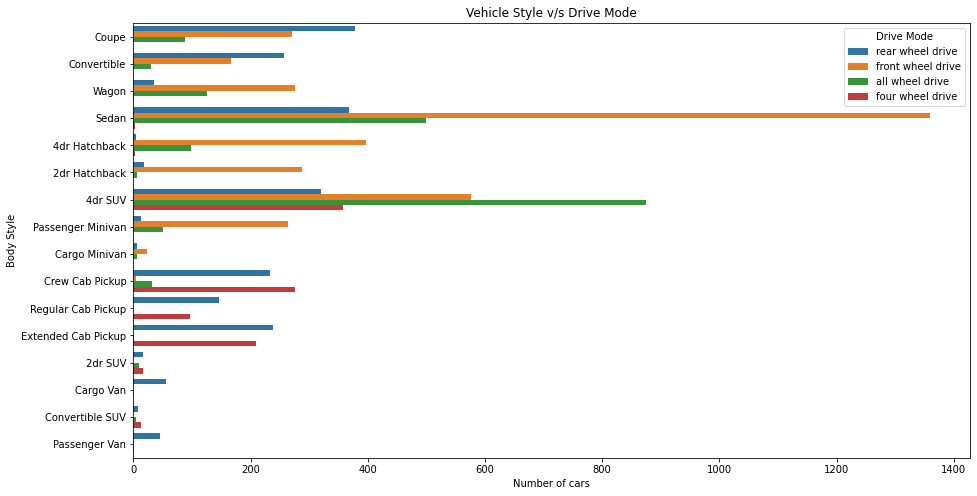

In [ ]:
#countplot on Vehicle Style v/s Drive Mode
plt.figure(figsize=(15,8))
sn.countplot(y='Vehicle Style',data=df,hue='Drive Mode')
plt.title('Vehicle Style v/s Drive Mode')
plt.ylabel('Body Style')
plt.xlabel('Number of cars');

The above countplot shows the number of cars that were sold in each vehicle style based on the drive mode.

Inference:
* In the most sold car type, **Sedan**, the **front wheel drive mode** is the most preferred drive mode

* In the 2nd most sold car type,**4dr SUV**, the **all wheel drive mode** is the most preferred drive mode

* In the 3rd most sold car type,**Coupe**, the **rear wheel drive mode** is the most preferred drive mode

## Sales based on price ranges

In [ ]:
#price groupings
df['price_group']=pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000],
                         labels=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'],include_lowest=True)
df['price_group']=df['price_group'].astype(object)

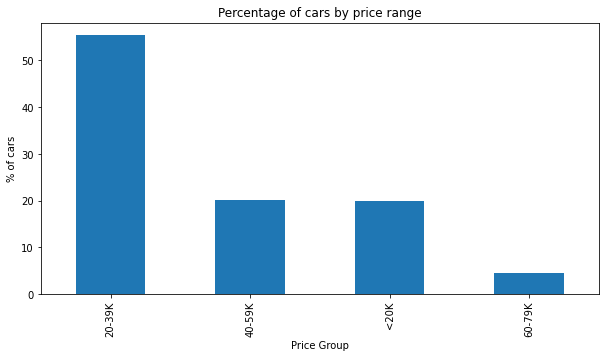

In [ ]:
#barplot for % of cars sold by price range
(df['price_group'].value_counts()/len(df)*100).plot.bar(figsize=(10,5))
plt.title('Percentage of cars by price range')
plt.ylabel('% of cars')
plt.xlabel('Price Group');

The above barplot depicts the percentage of cars sold according to their price ranges.

Inference:

More than 50% of the cars sold are in the **$20-39K** price range.

# Conclusion

The objectives of the project have been met. The Exploratory Data Analysis of the car dataset has been conducted and the findings have been documented.